In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy 

sns.set_theme(style='darkgrid', font_scale=1.5)

In [71]:
data = pd.read_excel('lab13data.xlsx')

In [72]:
U1 = np.array(data.iloc[1:16, 1], dtype= float)
I1 = np.array(data.iloc[1:16, 2], dtype= float)

U2 = np.array(data.iloc[1:16, 3], dtype= float)
I2 = np.array(data.iloc[1:16, 4], dtype= float)

I11 = scipy.interpolate.CubicSpline(U1[1:], I1[1:])
U11 = np.linspace(min(U1[1:]), max(U1), 1000)

I12 = scipy.interpolate.CubicSpline(U2[1:], I2[1:])
U12 = np.linspace(min(U2[1:]), max(U2), 1000)


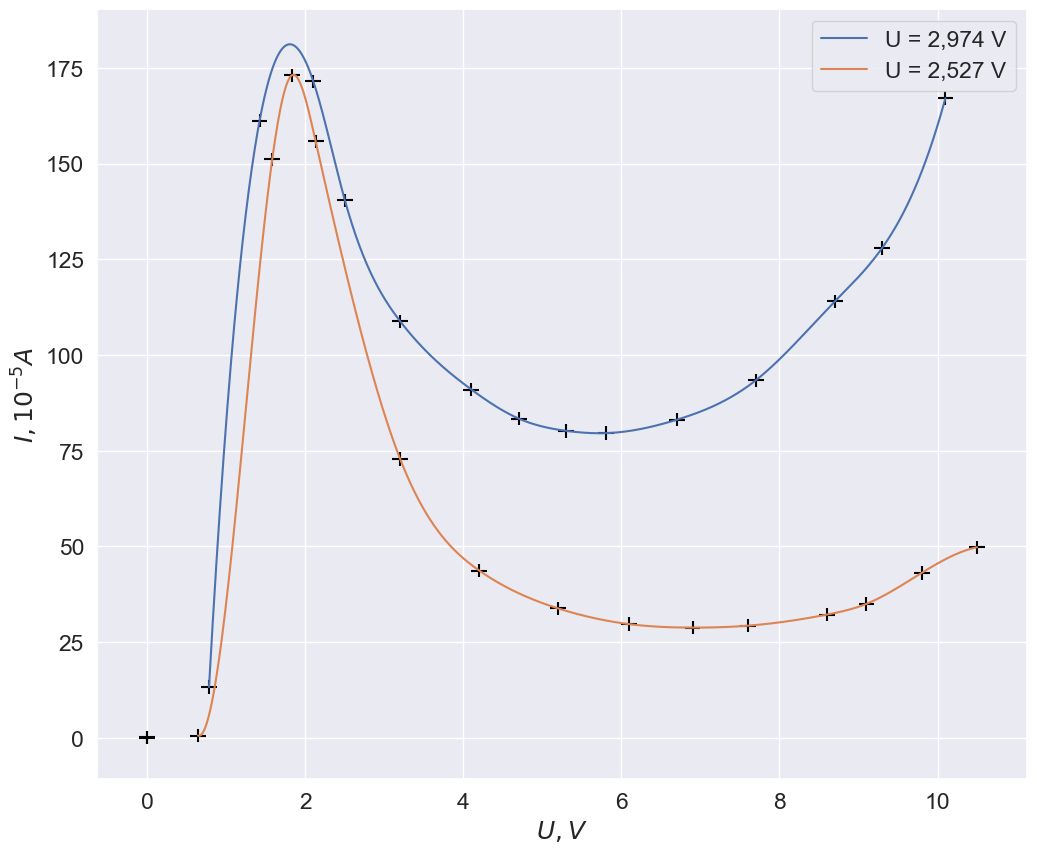

In [73]:
plt.figure(figsize= (12,10))
plt.errorbar(U1, I1, yerr=1.75, xerr=0.1, fmt = 'none', c = 'black')
plt.plot(U11, I11(U11), label = f'U = 2,974 V')
plt.errorbar(U2, I2, yerr=1.75, xerr=0.1, fmt = 'none', c = 'black')
plt.plot(U12, I12(U12), label = f'U = 2,527 V')
plt.legend()
plt.xlabel('$U, V$')
plt.ylabel('$I, 10^{-5}A$')
plt.savefig('plot.png')

In [74]:
qk = 1.60217663 * 10**(-19) 
h = 6.62 * 10 **(-34)
me = 9.1 * 10 ** (-31)

U00 = 0.8 * 6.8 - 1.8 * 2.8
U01 = 0.8 * 6.6 - 1.8 * 2.6

print(U00, U01)

0.40000000000000036 0.5999999999999996


In [75]:
l0 = (h*np.sqrt(5))/(np.sqrt(32*me*(6.8 - 2.8)*qk))
l1 = (h*np.sqrt(5))/(np.sqrt(32*me*(6.6 - 2.6)*qk))

print(l0, l1)


3.426589772549069e-10 3.4265897725490693e-10


In [76]:
I1_new  = I11(U11)

max1 = U11[np.argmax(I1_new)]
min1_ind = np.argmin(I1_new[300:])
min1 = U11[min1_ind+300]
print(max1, min1)

I2_new  = I12(U12)

max2 = U12[np.argmax(I2_new)]
min2_ind = np.argmin(I2_new[300:])
min2 = U12[min2_ind+300]
print(max2, min2)

1.8062262262262263 5.724544544544545
1.8441241241241242 6.927107107107106


In [77]:
Ud0= 0.8 * min1 - 1.8 * max1
Ud1 = 0.8 * min2 - 1.8 * max2

print(Ud0, Ud1)


1.328428428428429 2.222262262262262


In [78]:
l0 = (h*np.sqrt(5))/(np.sqrt(32*me*(min1 - max1)*qk))
l1 = (h*np.sqrt(5))/(np.sqrt(32*me*(min2 - max2)*qk))

print(l0, l1)

3.462121083255783e-10 3.039714408505872e-10


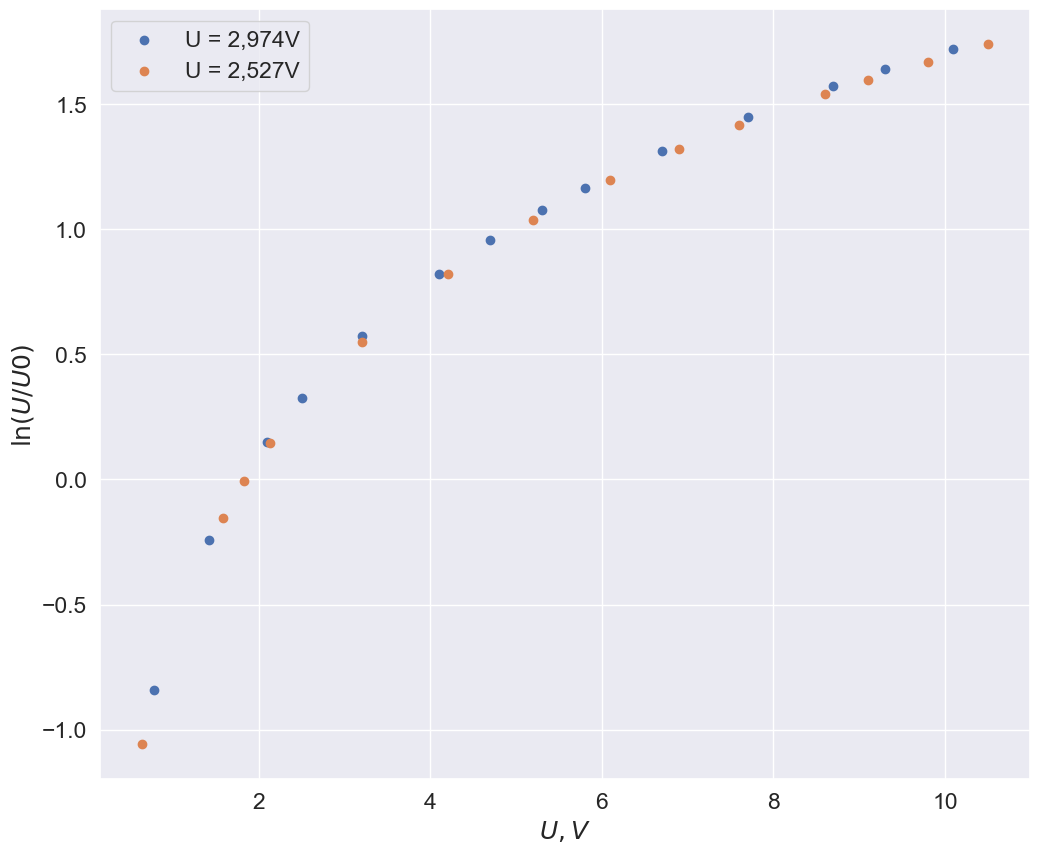

In [81]:
plt.figure(figsize= (12,10))
plt.scatter(U1[1:], np.log(U1[1:]/max1), label = f'U = 2,974V')
plt.scatter(U2[1:], np.log(U2[1:]/max2), label = f'U = 2,527V')
plt.legend()
plt.xlabel('$U, V$')
plt.ylabel('$\ln (U/U0)$')
plt.savefig('plot1.png')